<a href="https://colab.research.google.com/github/sebastian122901/Math-156-UCLA/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

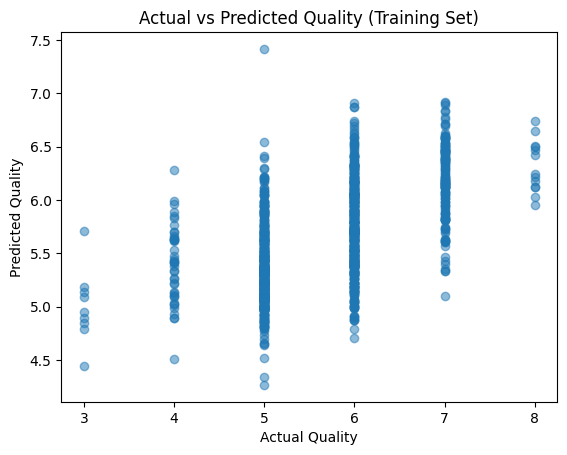

RMSE (Train): 0.6512995910592837
RMSE (Test): 0.5988611695560517
RMSE (Train) - LMS: 1.3695975081350003
RMSE (Test) - LMS: 1.4011042882684566


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler # Import StandardScaler for feature scaling

# Load the dataset
file_path = 'winequality-red.csv'  # Replace with your file path
wine_data = pd.read_csv(file_path, delimiter=';')


# Features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the splits
#print(X_train.shape, X_val.shape, X_test.shape)
#print(y_train.shape, y_val.shape, y_test.shape)

# Linear Regression (Closed-Form Solution)
def linear_regression_closed_form(X, y):
    # Add a bias term (column of ones) to the feature matrix
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Compute the closed-form solution
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    return w

# Train the linear regression model using the training set
w_closed_form = linear_regression_closed_form(X_train, y_train)

# Predict function
def predict(X, w):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(w)

# Predict on the training set
y_train_pred = predict(X_train, w_closed_form)

# Generate a plot of the actual target values vs predicted target values
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality (Training Set)')
plt.show()

# Compute RMSE for the training and test sets
y_test_pred = predict(X_test, w_closed_form)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'RMSE (Train): {rmse_train}')
print(f'RMSE (Test): {rmse_test}')

# Implement LMS Algorithm
def linear_regression_lms(X, y, lr=0.001, epochs=1000): # Reduced learning rate to 0.001
    # Add a bias term (column of ones) to the feature matrix
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Randomly initialize weights
    w = np.random.randn(X_b.shape[1])

    for epoch in range(epochs):
        gradients = 2/X_b.shape[0] * X_b.T.dot(X_b.dot(w) - y)
        w = w - lr * gradients

    return w

# Feature Scaling: Standardize the features before training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model using the training set with LMS and scaled features
w_lms = linear_regression_lms(X_train_scaled, y_train) # Use scaled training data

# Predict on the training set using scaled features
y_train_pred_lms = predict(X_train_scaled, w_lms) # Use scaled training data for prediction
y_test_pred_lms = predict(X_test_scaled, w_lms) # Use scaled test data for prediction


# Compute RMSE for the training and test sets
rmse_train_lms = np.sqrt(mean_squared_error(y_train, y_train_pred_lms))
rmse_test_lms = np.sqrt(mean_squared_error(y_test, y_test_pred_lms))

print(f'RMSE (Train) - LMS: {rmse_train_lms}')
print(f'RMSE (Test) - LMS: {rmse_test_lms}')

